In [1]:
import pandas as pd
import numpy as np
from utils import *

# Replace 'your_file.csv' with the path to your actual CSV file
file_path = '../data/fraud/real_world_creditcard.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

len(df)

284807

<Figure size 2400x1800 with 0 Axes>

In [2]:
df = df[["Amount"]]
df.head()

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99


In [6]:
new_data = np.random.choice(df['Amount'], size=600000-284807).tolist()
for i in range(len(new_data)):
    new_data[i] = new_data[i] + (i*0.0001*np.random.normal(1, 1))

In [7]:
real_life_items = df["Amount"].tolist()
dataset = real_life_items + new_data

# df = pd.concat([real_life_items, new_data], ignore_index=True)


In [8]:
print(len(dataset))

600000


original ks_score: 0.05473
Bins KS score: 0.05084
reference_digest.batch_update(ref_data) took:1.7790453433990479 seconds to run.
test_digest.batch_update(ref_data) took:1.6171441078186035 seconds to run.
checking the loop took:93.79702663421631 seconds to run.
Digest KS score: 0.057659938916321485
----------------------------------------------------
original ks_score: 0.05178
Bins KS score: 0.04582
reference_digest.batch_update(ref_data) took:1.7089767456054688 seconds to run.
test_digest.batch_update(ref_data) took:1.7306671142578125 seconds to run.
checking the loop took:106.96202230453491 seconds to run.
Digest KS score: 0.053310325773947675
----------------------------------------------------
original ks_score: 0.12508
Bins KS score: 0.07039
reference_digest.batch_update(ref_data) took:1.7394812107086182 seconds to run.
test_digest.batch_update(ref_data) took:2.150909185409546 seconds to run.
checking the loop took:177.16424870491028 seconds to run.
Digest KS score: 0.124651098265

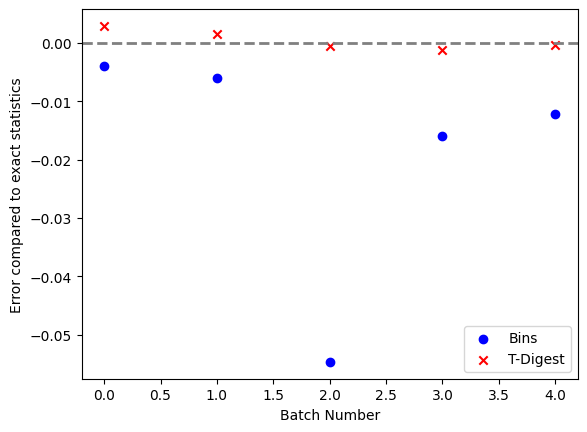

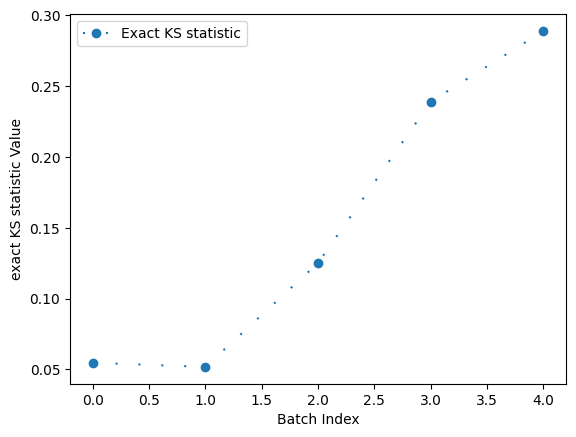

In [11]:

# reference_data = pd.concat([monthly_dfs["2019-01"], monthly_dfs["2019-02"]], ignore_index=True)
reference_data = dataset[:100000]
test_data_all = dataset[100000:]
ground_truth_vals = []
bins_vals = []
digest_vals = []
chunk_size = 100000
for i in range(0, len(test_data_all), chunk_size):
    test_data = test_data_all[i:i + chunk_size]
    original_ks = get_original_ks(reference_data, test_data)
    ground_truth_vals.append(original_ks)
    print(f'original ks_score: {original_ks}')
    bins_val = get_bins_ks(reference_data, test_data)
    bins_vals.append(bins_val)
    print(f'Bins KS score: {bins_val}')
    dig_val = get_digest_ks(reference_data, test_data)
    digest_vals.append(dig_val)
    print(f'Digest KS score: {dig_val}')

    print("----------------------------------------------------")

print(ground_truth_vals)





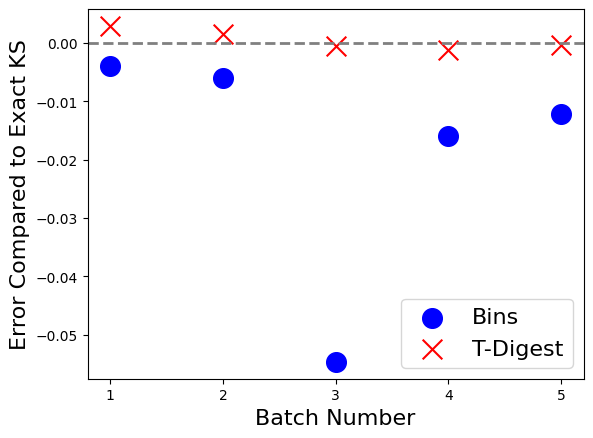

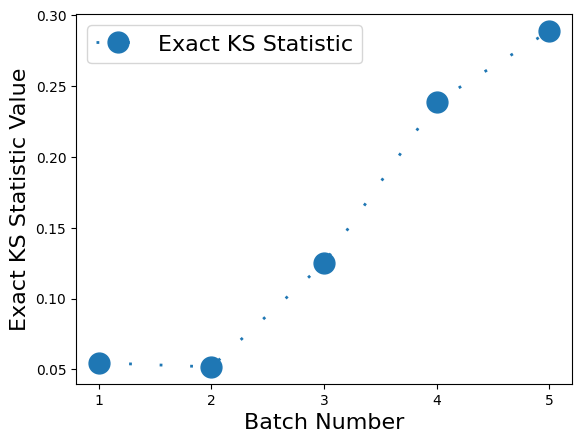

In [17]:
from utils import *

def plot_errors_lines2(ground_t_l, bins_l, digest_l, figure_name="figure"):
    # Calculate the differences
    differences_bins = [est1 - true for est1, true in zip(bins_l, ground_t_l)]
    differences_digest = [est2 - true for est2, true in zip(digest_l, ground_t_l)]

    # Create a scatter plot
    # plt.figure(figsize=(10, 5))

    batches = range(1, len(ground_t_l)+1)
    # Plot method 1
    plt.scatter(batches, differences_bins, color='blue', label='Bins', marker='o', s=200)
    # Plot method 2
    plt.scatter(batches, differences_digest, color='red', label='T-Digest', marker='x', s=200)
    #
    # # Connect points to the zero difference line
    # for i, true_value in enumerate(ground_t_l):
    #     plt.plot([true_value, true_value], [0, differences_bins[i]], color='blue', linestyle='dotted')
    #     plt.plot([true_value, true_value], [0, differences_digest[i]], color='red', linestyle='dotted')

    # Draw a line at 0 to represent the true value
    plt.axhline(0, color='grey', lw=2, linestyle='--')

    # Label the axes
    plt.xlabel('Batch Number', fontsize=16)
    plt.ylabel('Error Compared to Exact KS', fontsize=16)
    # plt.title('Comparison of Estimation Methods')

    # Add a legend
    plt.legend(loc='lower right', fontsize=16)

    plt.xticks(batches)

    # Show the plot
    plt.savefig(f'figures/{figure_name}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()


def plot_exact_KS2(ground_t_l, figure_name="figure"):
    batches = range(1, len(ground_t_l)+1)
    # Plot ground truth
    plt.plot(batches, ground_t_l, label='Exact KS Statistic', linestyle=(0, (1, 10)),  linewidth=2, marker='o', markersize=15)

    # Add labels, title, and legend
    plt.xlabel('Batch Number', fontsize=16)
    plt.ylabel('Exact KS Statistic Value', fontsize=16)
    plt.legend(fontsize=16)
    plt.xticks(batches)

    # Show the plot
    plt.savefig(f'figures/{figure_name}.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()



original_ks_vals = [0.05473, 0.05178, 0.12508, 0.23889, 0.28884]
Bins_ks_vals = [0.05084, 0.04582, 0.07039, 0.22301, 0.2767]
digest_ks_vals = [0.057659938916321485, 0.053310325773947675, 0.12465109826531304, 0.2376407461315312, 0.288535852137784]
plot_errors_lines2(original_ks_vals, Bins_ks_vals, digest_ks_vals, figure_name="read_world_fraud_gradual_bins_vs_digest")

plot_exact_KS2(original_ks_vals, figure_name="read_world_fraud_gradual_drift_100k_ks")
